In [38]:
import mne
from mne.preprocessing import ICA
%matplotlib qt

In [39]:
# Load your preprocessed healthy epochs
healthy_epochs_path = 'Demo Processed/Healthy/Healthy Eyes Close/H S1 EC_epo.fif'  # Example file path
healthy_epochs = mne.read_epochs(healthy_epochs_path)

Reading C:\Users\khand\MDD\W.out Sep (train)\New Workflow\Preprocessing\Demo Processed\Healthy\Healthy Eyes Close\H S1 EC_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
299 matching events found
No baseline correction applied
0 projection items activated


In [42]:
# Mapping of current channel names to standard 10-20 system names
mapping = {
    'EEG Fp1-LE': 'Fp1',
    'EEG F3-LE': 'F3',
    'EEG C3-LE': 'C3',
    'EEG P3-LE': 'P3',
    'EEG O1-LE': 'O1',
    'EEG F7-LE': 'F7',
    'EEG T3-LE': 'T3',
    'EEG T5-LE': 'T5',
    'EEG Fz-LE': 'Fz',
    'EEG Fp2-LE': 'Fp2',
    'EEG F4-LE': 'F4',
    'EEG C4-LE': 'C4',
    'EEG P4-LE': 'P4',
    'EEG O2-LE': 'O2',
    'EEG F8-LE': 'F8',
    'EEG T4-LE': 'T4',
    'EEG T6-LE': 'T6',
    'EEG Cz-LE': 'Cz',
    'EEG Pz-LE': 'Pz',
    'EEG A2-A1': 'A2'
}

# Rename the channels
healthy_epochs.rename_channels(mapping)

Number of events,299
Events,Healthy: 299
Time range,-0.199 – 0.500 s
Baseline,off


In [26]:
# Set a standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')

# Apply the montage to the data
healthy_epochs.set_montage(montage)

Number of events,299
Events,Healthy: 299
Time range,-0.199 – 0.500 s
Baseline,off


In [27]:
# Set up and fit ICA
ica = ICA(n_components=20, random_state=97, max_iter=800)  # n_components = number of ICs
ica.fit(healthy_epochs)

Fitting ICA to data using 20 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.7s.


C:\Users\khand\AppData\Local\Temp\ipykernel_27428\103312948.py:3: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (8.6) and smallest (6.4e-16) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 19
  ica.fit(healthy_epochs)


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=800
Fit,35 iterations on epochs (53820 samples)
ICA components,20
Available PCA components,20
Channel types,eeg
ICA components marked for exclusion,—


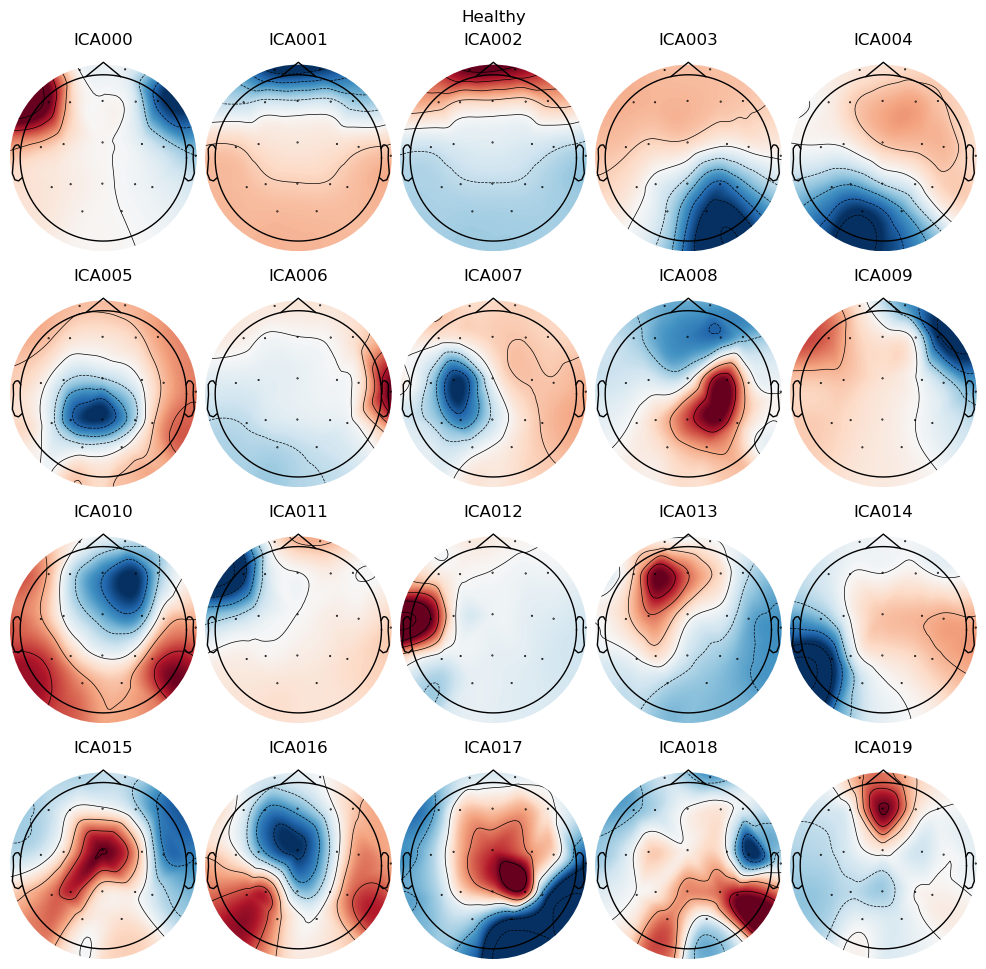

In [34]:
# Plot the ICs
ica.plot_components(title='Healthy')  # Visualize the components (topographical plots)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


C:\Users\khand\AppData\Local\Temp\ipykernel_27428\3382354681.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  healthy_epochs.plot_psd()


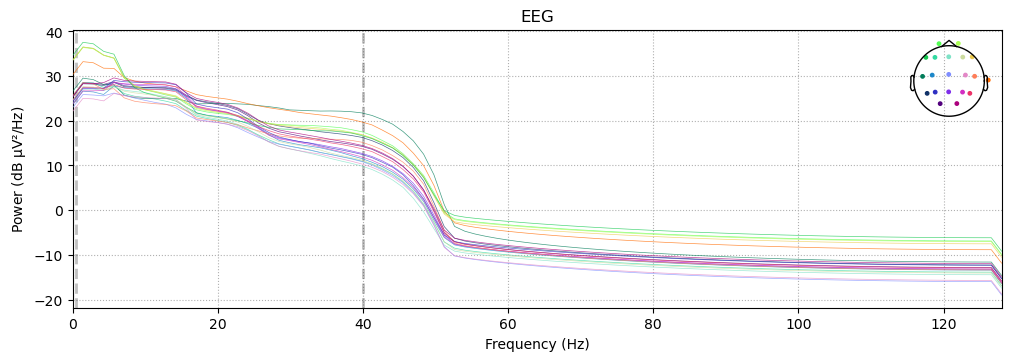

In [37]:
healthy_epochs.plot_psd()

In [29]:
# Load your preprocessed unhealthy epochs
unhealthy_epochs_path = 'Demo Processed/Non healthy/MDD Eyes Close/MDD S1 EC_epo.fif'  # Example file path
unhealthy_epochs = mne.read_epochs(unhealthy_epochs_path)

Reading C:\Users\khand\MDD\W.out Sep (train)\New Workflow\Preprocessing\Demo Processed\Non healthy\MDD Eyes Close\MDD S1 EC_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -199.22 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
302 matching events found
No baseline correction applied
0 projection items activated


In [30]:
# Mapping of current channel names to standard 10-20 system names
mapping = {
    'EEG Fp1-LE': 'Fp1',
    'EEG F3-LE': 'F3',
    'EEG C3-LE': 'C3',
    'EEG P3-LE': 'P3',
    'EEG O1-LE': 'O1',
    'EEG F7-LE': 'F7',
    'EEG T3-LE': 'T3',
    'EEG T5-LE': 'T5',
    'EEG Fz-LE': 'Fz',
    'EEG Fp2-LE': 'Fp2',
    'EEG F4-LE': 'F4',
    'EEG C4-LE': 'C4',
    'EEG P4-LE': 'P4',
    'EEG O2-LE': 'O2',
    'EEG F8-LE': 'F8',
    'EEG T4-LE': 'T4',
    'EEG T6-LE': 'T6',
    'EEG Cz-LE': 'Cz',
    'EEG Pz-LE': 'Pz',
    'EEG A2-A1': 'A2'
}

# Rename the channels
unhealthy_epochs.rename_channels(mapping)

Number of events,302
Events,Non healthy: 302
Time range,-0.199 – 0.500 s
Baseline,off


In [31]:
# Set a standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')

# Apply the montage to the data
unhealthy_epochs.set_montage(montage)

Number of events,302
Events,Non healthy: 302
Time range,-0.199 – 0.500 s
Baseline,off


In [32]:
# Set up and fit ICA for unhealthy data
ica_unhealthy = ICA(n_components=20, random_state=97, max_iter=800)
ica_unhealthy.fit(unhealthy_epochs)

Fitting ICA to data using 20 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 0.6s.


C:\Users\khand\AppData\Local\Temp\ipykernel_27428\1468622192.py:3: RuntimeWarning: Using n_components=20 (resulting in n_components_=20) may lead to an unstable mixing matrix estimation because the ratio between the largest (18) and smallest (5.9e-16) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 19
  ica_unhealthy.fit(unhealthy_epochs)


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=800
Fit,32 iterations on epochs (54360 samples)
ICA components,20
Available PCA components,20
Channel types,eeg
ICA components marked for exclusion,—


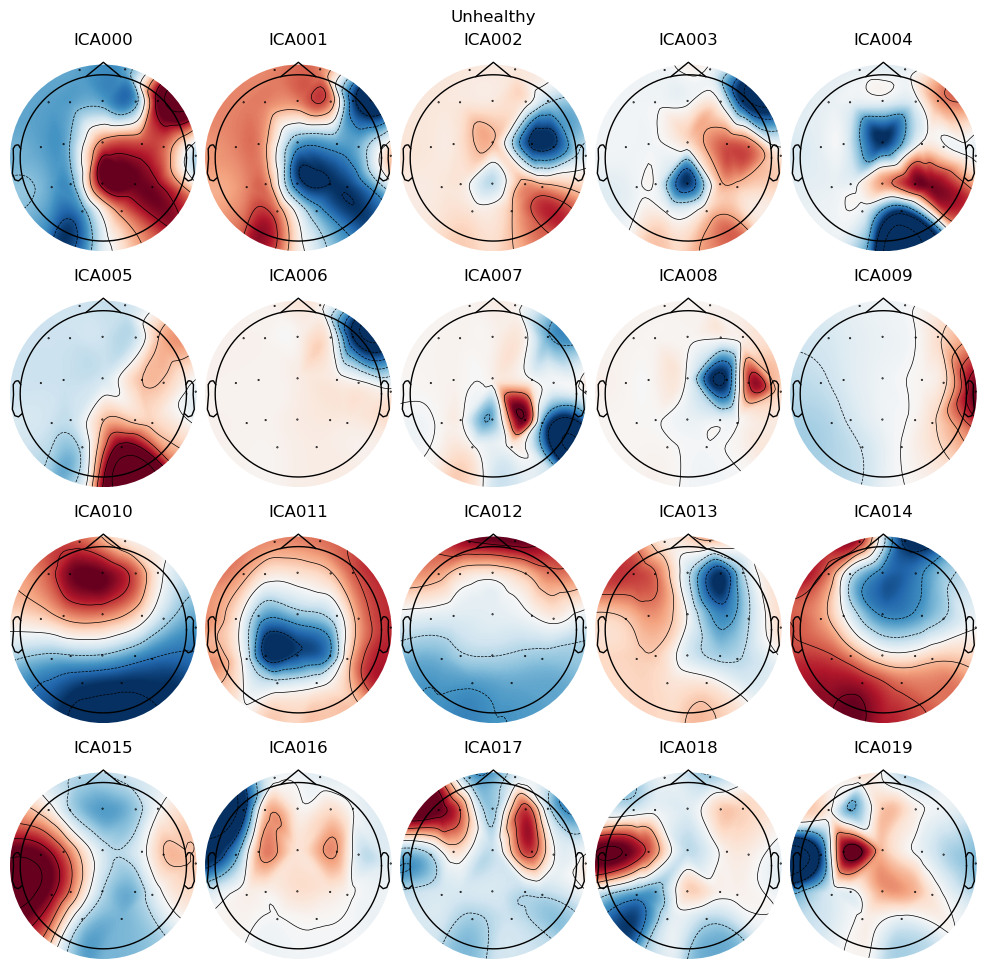

In [35]:
# Plot the ICs for unhealthy data
ica_unhealthy.plot_components(title='Unhealthy')  # Visualize the components (topographical plots)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


C:\Users\khand\AppData\Local\Temp\ipykernel_27428\235401195.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  unhealthy_epochs.plot_psd()


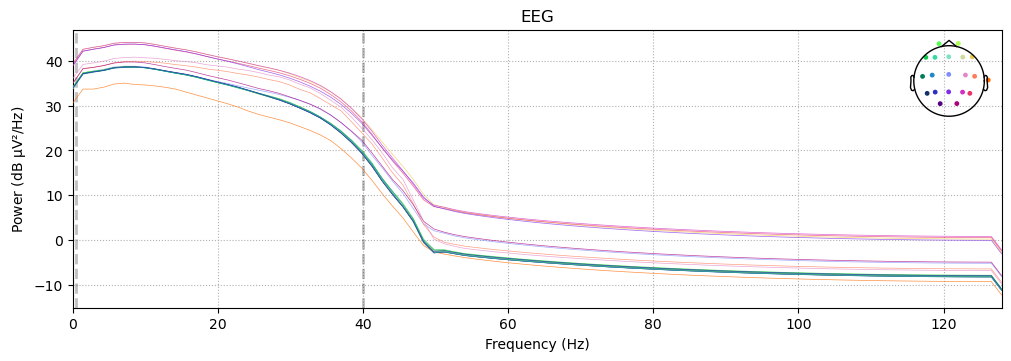

In [36]:
unhealthy_epochs.plot_psd()